# 데이터 소개

#### titanic open dataset

타이타닉 데이터 셋은 1912년 가라앉은 유람선 타이타닉 호의 승객 정보를 기반으로한 데이터셋이다.  


**목표 : 승객에 대한 정보를 바탕으로 생존여부를 예측**

----------

    - 각 파일의 컬럼은 아래와 같습니다.
    Survived: 생존 여부 (0: 생존하지 못한 경우, 1: 생존한 경우)
    Pclass: 티켓 등급 (1: 1등석, 2: 2등석, 3: 3등석)
    Sex: 승객 성별
    Age: 승객 나이
    Sibsp: 함께 탑승한 형제/자매 또는 배우자의 수
    Parch: 함께 탑승한 부모/자녀의 수
    Fare: 운임 요금
    Embarked: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)
    Class : pclass와 동일
    Who : 남자,여자,아이
    deck : 데크 번호(알파벳 + 숫자 혼용)
    Embark_town : 탑승항구 이름
    adult_male : 성인 남자 여부
    alive : 생존여부(no, yes)
    alone : 혼자 탑승 여부
---

## Q1. 목표에 따른 Train data와 target data는 무엇이 되어야할지 정의해보세요.

In [ ]:
# Train data : The variables excluding target
# Target data : "Survived", "alive"

# 데이터 EDA

## EDA(Exploratory Data Analysis)
처음 데이터(raw data)에서 데이터를 확인하고 분석 및 출력(시각화)하면서 인사이트를 얻어내는 과정.  

## Dataset 준비하기

In [1]:
# 기본적인 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
titanic = sns.load_dataset('titanic')

### Q2. 데이터 로드 후에 데이터를 살펴보기 위해서 head(), info(), describe()를 사용합니다.   
### 각 method를 사용해보고 어떤 정보를 알 수 있는지 정리하세요.

In [ ]:
titanic
# type(titanic)

pandas.core.frame.DataFrame

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 데이터 구조 살펴보기 (ex. head(), info(), describe())
# head() : gives the first five entries
# info() : shows the variables, types and non-null counts
# describe() : gives the summary statistics for the dataset

## Data Visualization

시각화는 라이브러리 종류도 다양하고, 그래프 종류도 다양합니다.   
데이터에 대한 빠른 이해를 돕고, 데이터에 대한 인사이트를 찾는데 도움을 줍니다.

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

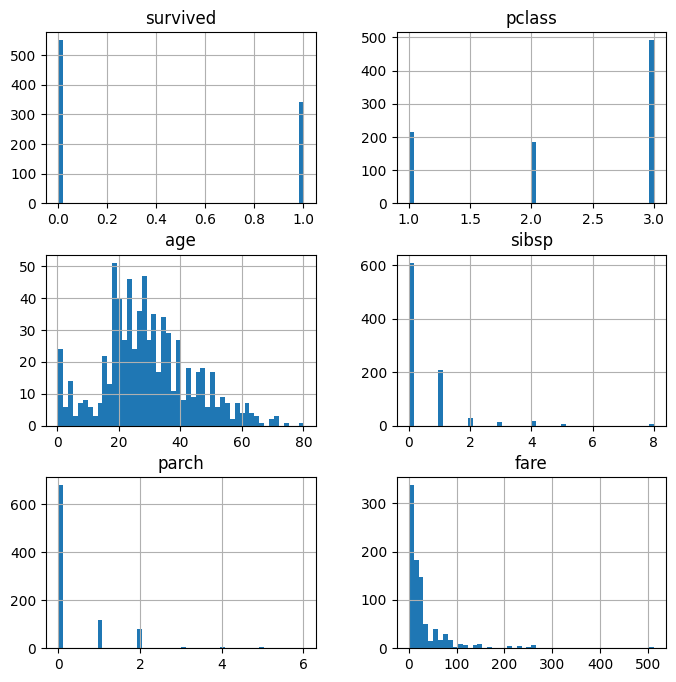

In [ ]:
# numerical feature에 대해서만 histogram
titanic.hist(bins = 50, figsize = (8,8))

### Q3. 수치형 + boolian형 데이터 간의 상관관계 분석하기

<Axes: >

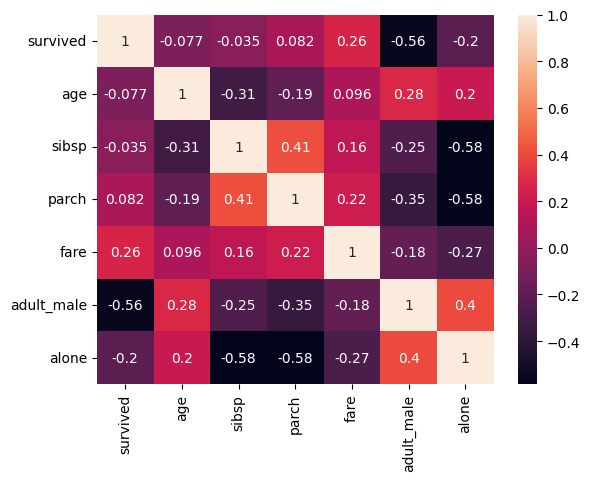

In [ ]:
titanic_num_bool = titanic[["survived", "age", "sibsp", "parch", "fare",
                            "adult_male", "alone"]]
titanic_num_bool
cor=titanic_num_bool.corr()
sns.heatmap(data=cor, annot = True)


<Axes: xlabel='sex', ylabel='count'>

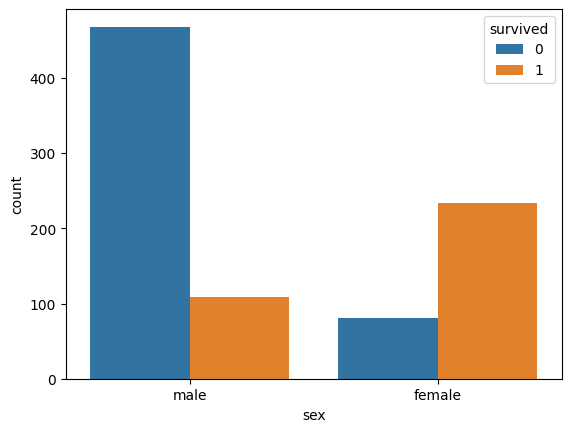

In [ ]:
# 성별에 따른 생존여부
sns.countplot(data=titanic, x='sex', hue='survived')

<Axes: xlabel='survived', ylabel='count'>

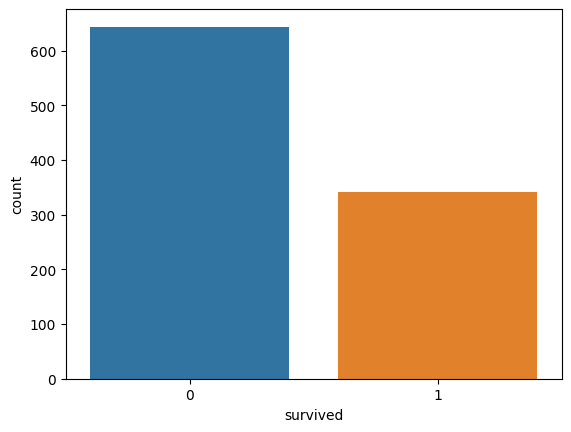

In [ ]:
# 생존여부에 따른 승객 수
sns.countplot(data=titanic, x='embarked') # original. is this right?
sns.countplot(data=titanic, x='survived') # fixed

<Axes: xlabel='embarked', ylabel='count'>

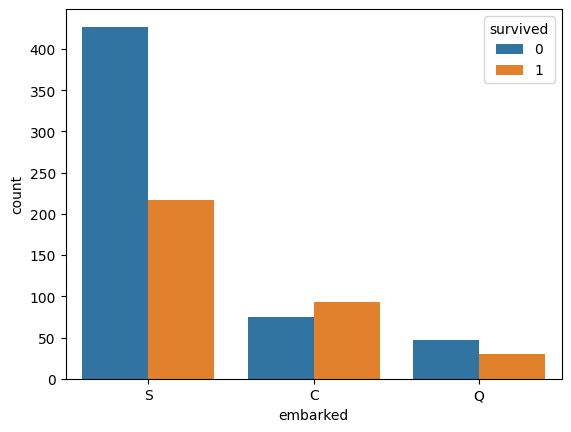

In [ ]:
# 승선항에 따른 생존여부
sns.countplot(data=titanic, x='embarked', hue='survived')

<Axes: xlabel='pclass', ylabel='count'>

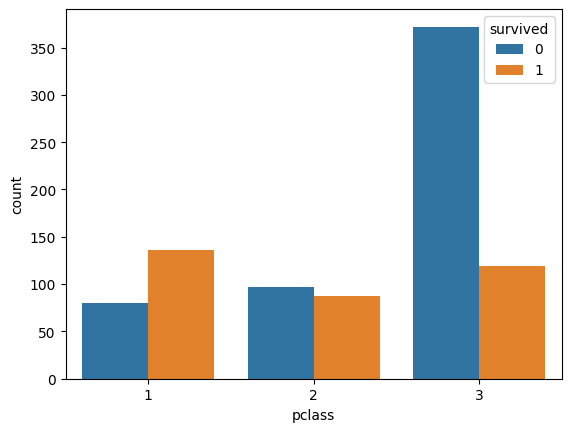

In [ ]:
# 클래스에 따른 생존여부
sns.countplot(data=titanic, x='pclass', hue='survived')

<Axes: xlabel='age', ylabel='Count'>

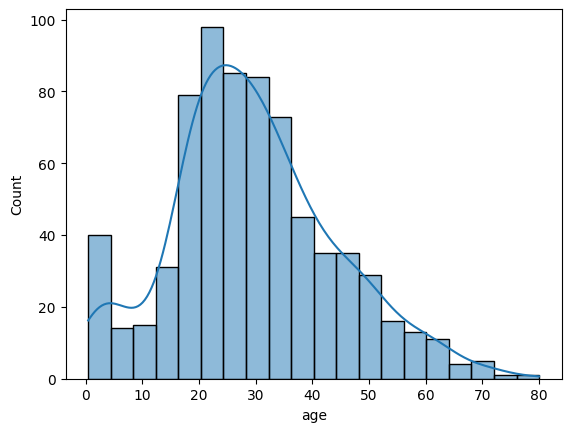

In [ ]:
# 연령 분포
sns.histplot(data=titanic, x='age', kde=True)

<Axes: xlabel='survived', ylabel='age'>

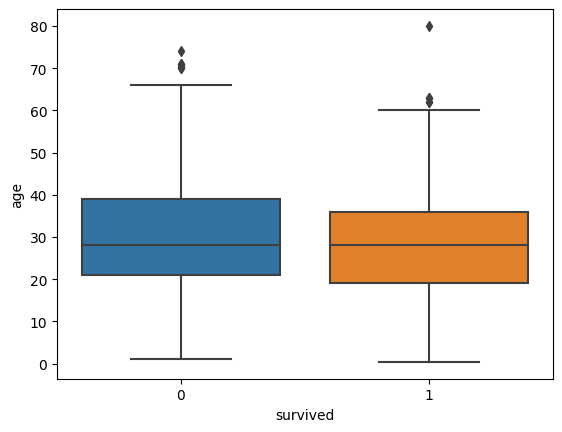

In [ ]:
# 연령과 생존여부의 관계
sns.boxplot(data=titanic, x='survived', y='age')

### Q4. 좌석의 클래스(pclass)와 age간의 분포를 boxplot으로 그려보세요.

<Axes: xlabel='pclass', ylabel='age'>

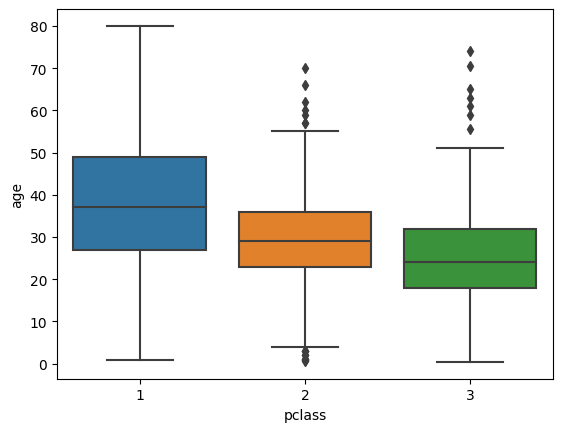

In [ ]:
# sns.boxplot
sns.boxplot(data=titanic, x="pclass", y="age")

### Q5. 위에 보여준 그래프들(or 본인이 그려본 그래프)로 부터, 한 그래프를 선정하여 해당 그래프에서 어떤 정보를 얻을 수 있는지 작성하세요.

In [ ]:
# ex) 클래스에 따른 생존여부 bar 그래프를 보면,
#     좌석 클래스가 낮아지면(1->3) 생존하지 못하는 경향을 보인다.

#성별에 따른 생존여부
#  총 탑승객의 수는 남성이 여성보다 많다. 남성 승객들은 대부분 사망했고(약80%), 여성 승객들은 대부분 생존했다(약 70%)

# 생존여부에 따른 승객 수
# S항구 탑승자가 가장 많고, 다음이 C, 다음이 Q이다. (기존 코드에 문제가 있는 듯)
# 사망한 승객이 2배정도 된다.

# 승선항에 따른 생존여부
#  탑승객 수는 S, C, Q순이다. S는 사망자가 생존자보다 2배 많고, C항구는 비슷하다. Q항구는 생존자가 사망자보다 많다.

# 클래승에 따른 생존 여부
# 1, 2등석은 사망자가 적고, 1등석이 생존자가 가장 많다. 3등석은 사망자 비율이 훨씬 높다.

# 연령분포
# 0-10세, 20-40세에 peak이 있는 bimodal한 분포이다. 결혼 적령기에 승객들 중에 자녀를 동반한 탑승객이 많다고 할 수 있다.

# 연령과 생존여부
# 사망자와 생존자의 연령분포는 큰 차이는 없다.

# 연령과 클래스
# 승객의 나이가 젊을수록 등급이 낮은 좌석에 앉는 경향이 있다.


## 각 feature 별로 결측치가 있는지 확인

마찬가지로 결측치를 찾는 방법도 다양합니다.   
추후 프로젝트를 진행하시면서 스스로 다양한 방식을 사용해보세요


isna().sum(), info()


In [3]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# shows row with at least one NA
titanic.loc[titanic.isna().any(axis='columns')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


# 데이터 전처리

1. 결측치 처리  

2. 이상치 처리

3. 데이터 형태 변환

4. 스케일링



## 중복된 columns 제거
Survived = alive : 생존여부  
Pclass = Class : 티켓 등급  
Embarked = Embark_town : 탑승 항구  

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# drop columns 'alive', 'class', 'embark_town'
titanic.drop(labels = ['alive','class','embark_town'], axis = 1, inplace=True)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


## 결측치 처리하기
각 columns을 분석하여 미기입/오기입 된 데이터를 확인합니다.  
결측치는 판단에 따라 drop 할 수 있고, 특정 값으로 채울 수 있습니다.  
데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [7]:
titanic.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          688
alone           0
dtype: int64

In [8]:
titanic.shape

(891, 12)

본 과제에서는 drop하는 방식을 사용하겠습니다.

In [9]:
titanic.drop(labels = 'deck', axis = 1, inplace = True)
titanic = titanic.dropna(subset= ['age'])

In [10]:
titanic.shape

(714, 11)

## 아웃라이어 제거

<Axes: >

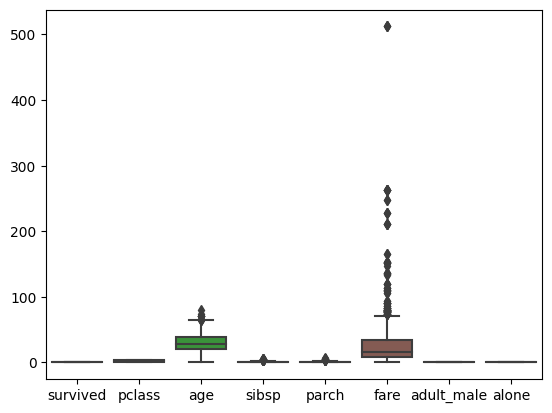

In [11]:
sns.boxplot(data = titanic)

Fare에 대한 데이터에서 이상치가 존재하는 것을 확인할 수 있음.

In [ ]:
# quantile, dorp 등의 메소드를 이용해서 ouiler를 제거할 수 있습니다.(ex. IQR 방식)
# 기본적인 예시코드이므로 꼭 이와 같이 진행해야한다는 건 아니고, 이런 방향으로 한다 정도로만 보시면 됩니다!

<Axes: >

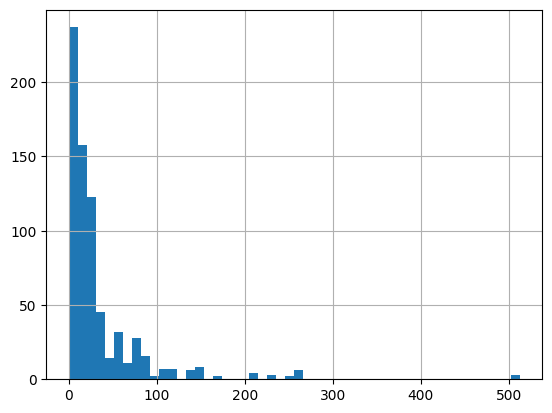

In [12]:
titanic['fare'].hist(bins = 50)

In [13]:
p1 = titanic['fare'].quantile(0.95)
p2 = titanic['fare'].quantile(0.005)

print(p1, p2)

120.0 0.0


<Axes: >

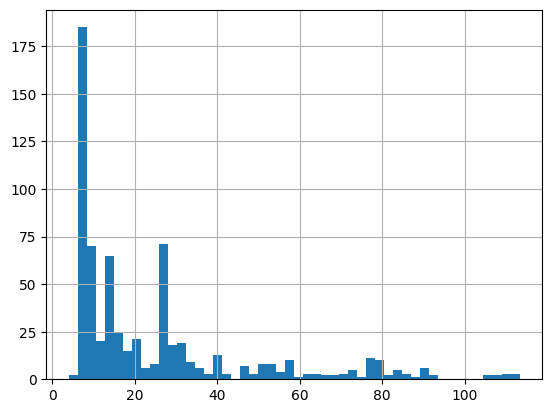

In [14]:
titanic = titanic[(titanic['fare'] < p1) & (titanic['fare'] > p2)]
titanic['fare'].hist(bins = 50)

## 데이터 형태 변환
입력 데이터는 숫자들로 구성이 된 행렬 형태의 데이터입니다. 그러나 실제 데이터의 경우 모델의 입력 형태에 적합하지 않은 형태로 제공이 됩니다.
  - 모델에 맞게 데이터를 변환하는 과정.  
    (텍스트 데이터 -> 수치형 데이터)

In [15]:
# 어떤 column이 범주형이고, 어떤 column이 수치형인지 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    669 non-null    int64  
 1   pclass      669 non-null    int64  
 2   sex         669 non-null    object 
 3   age         669 non-null    float64
 4   sibsp       669 non-null    int64  
 5   parch       669 non-null    int64  
 6   fare        669 non-null    float64
 7   embarked    667 non-null    object 
 8   who         669 non-null    object 
 9   adult_male  669 non-null    bool   
 10  alone       669 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 53.6+ KB


In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


### Q6. get_dummies를 이용해서 범주형 데이터를 변환하세요.
변환된 데이터는 X_cat으로 저장

In [39]:
# get_dummies를 이용한 범주형 데이터 전처리
# https://www.datasciencemadesimple.com/convert-column-to-categorical-pandas-python-2/
X_cat=pd.get_dummies(titanic[['sex', 'embarked']])
X_cat
# X_cat['survived'] = pd.Categorical(titanic.survived)
# X_cat['pclass'] = pd.Categorical(titanic.pclass)
# X_cat['sibsp'] = pd.Categorical(titanic.sibsp)
# X_cat['parch'] = pd.Categorical(titanic.parch)
# X_cat

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
885,1,0,0,1,0
886,0,1,0,0,1
887,1,0,0,0,1
889,0,1,1,0,0


In [40]:
X_cat.info() # is this right?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_female  669 non-null    uint8
 1   sex_male    669 non-null    uint8
 2   embarked_C  669 non-null    uint8
 3   embarked_Q  669 non-null    uint8
 4   embarked_S  669 non-null    uint8
dtypes: uint8(5)
memory usage: 8.5 KB


## 정규화, 표준화
columns 간의 단위 차이를 조정해주는 역할

In [32]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_num = titanic[['pclass',	'age', 'sibsp', 'parch', 'fare']]
X_else = titanic[['survived', 'adult_male',	'alone']]

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

## train test data split

In [42]:
# 전처리된 데이터들 합치기
X = pd.concat([X_scaled, X_cat, X_else], axis =1)

# target 변수 y 지정
y = X['survived']

X = X.drop(labels = 'survived', axis = 1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# model 선택 및 train

## Q7. Classification model 종류에 대해 검색해보고 하나 선택하여 학습하기

아직 모델에 대해 배우지 않았기에 크게 신경쓰지 않아도 됩니다.  
단지 'model 선택 및 train 단계'가 있다는 것을 배우기 위한 과정입니다.  
기존에 알고 계시는 어떤 모델을 사용하셔도 상관없습니다.  
알고 있는 모델이 없으시면 구글링 후에 하나 선택하시면 됩니다.

In [45]:
# 예시 코드 - 모델 선택
from sklearn.linear_model import SGDClassifier
model_sdg = SGDClassifier(loss = 'log')

In [53]:
# Try logistic regression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [46]:
# 예시 코드 - 선택 모델 학습
model_sdg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [55]:
# train logistic regression
model_LR.fit(X_train, y_train)

LogisticRegression()

## model 평가
### Q. 본인이 선정한 모델의 성능을 평가해보세요

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
# 예시 코드 - test 데이터 예측
y_pred = model_sdg.predict(X_test)

In [56]:
# logistic regression
y_pred = model_LR.predict(X_test)

In [49]:
# 예시 코드 - 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy)

Accuracy :  0.7761194029850746


In [57]:
# logistic regression
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8134328358208955


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

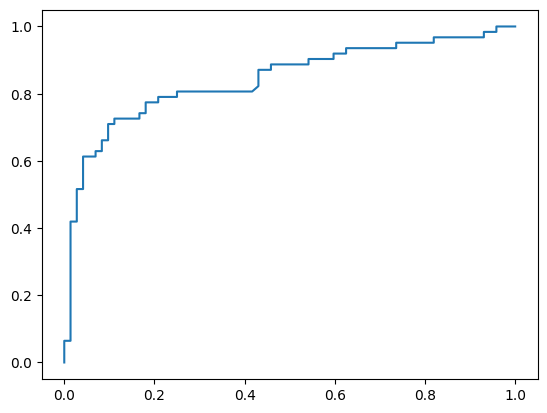

AUC : 0.8430779569892473


In [60]:
# Prediction prob
y_prob = model_LR.predict_proba(X_test)[:,1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC curve')
plt.show()

# AUC
print('AUC : {}'.format(roc_auc_score(y_test, y_prob)))

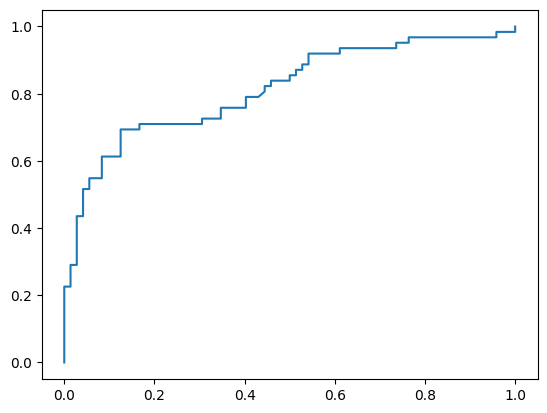

AUC : 0.8130600358422939


In [51]:
# 테스트 데이터에 대한 예측 확률 계산
y_prob = model_sdg.predict_proba(X_test)[:,1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC curve')
plt.show()

# AUC
print('AUC : {}'.format(roc_auc_score(y_test, y_prob)))